<a href="https://colab.research.google.com/github/sushmitasardar/Tesla-code-EDA-project.1/blob/main/Hotel_Booking_Analysis(Team_colab)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


# **Importing required packages for data cleaning and manipulation**



In [2]:
# importing pandas library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing dataset**

In [4]:
# Importing the dataset
file_path = '/content/drive/MyDrive/capstone project/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

# **Data Exploration**

In [5]:
# checking the number of rows and columns
hotel_df.shape

(119390, 32)

In [6]:
# checking the rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Looking for the data tpye non null entries
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Description:**
***hotel*** : Resort Hotel / City Hotel

***is_canceled***:if the booking was canceled- 1 / not - 0

***lead_time*** : No of days between the entering date of the booking into the PMS and the arrival date

***arrival_date_year*** : Year of arrival date

***arrival_date_month*** : Month of arrival date

***arrival_date_week_number*** : Week no of year for arrival date

***arrival_date_day_of_month*** : Day of arrival date

***stays_in_weekend_nights*** : No of weekend nigh

***stays_in_weekend_nights*** : No of weekend nights (Saturday / Sunday) the guest stayed / booked to stay at the hotel

***stays_in_week_nights*** : No of week nights (Monday to Friday) the guest stayed / booked to stay at the hotel

***adults*** : No of adults

***children*** : No of children

***babies*** : No of babies

***meal*** : Type of meal booked. 

***country*** : Country of origin.
***market_segment*** : Market segment designation. In categories, “TA” - “Travel Agents” and “TO” - “Tour Operators”

***distribution_channel*** : Booking distribution channel. “TA” - “Travel Agents” and “TO” - “Tour Operators”

***is_repeated_guest*** : tells whether the booking name was repeated guest -1 / not- 0

***previous_cancellations*** : No of previous bookings that were cancelled by customer prior to the current booking

***previous_bookings_not_canceled*** : No of previous bookings not cancelled by customer prior to the current booking

***reserved_room_type*** : Code of room type reserved.

***assigned_room_type*** : Code for the type of room assigned.

***booking_changes*** : No of changes made between booking till moment of check-in or cancellation

***deposit_type***: Tells customer made a deposit to guarantee the booking.

***agent*** : ID of the travel agency that made the booking
***company*** : ID of the company that made the booking 

***days_in_waiting_list*** : No of days the booking was in the waiting list before it got confirmed to customer

***customer_type*** : Type of customer

***adr*** : Average Daily Rate = sum of all lodging transactions/total number of staying nights

***required_car_parking_spaces*** : No of car parking spaces required 

***total_of_special_requests*** : No of special requests made by customer
***reservation_status*** : Reservation last status, assuming the below categories

*Canceled*  – customer canceled the booking

*Check-Out* – customer has checked in and departed also

*No-Show*   – customer did not check-in and did inform the hotel as well

***reservation_status_date*** : Date at which the last status was set. Can be combined with Reservation Status to get booking canceled or customer checked-out

# **Data Cleaning**
## Before doing the EDA we need to clean our data by removing all the null and NaN  values so that we can get correct outcome after doing EDA.

## While cleaning the data we will follow fews steps:-


*   Removing the null and NaN values.
*   Dropping the duplicate rows.



In [8]:
#checking for Null Values
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# Defining the data
df= hotel_df.copy()

In [10]:
# Replacing the null with 0
null_columns=['agent','children','company']
for colm in null_columns:
  df[colm].fillna(0,inplace=True)

In [11]:
# Checking if all the null values are removed
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [12]:
# Replacing the nan values with other
df['country'].fillna('others',inplace=True)

In [13]:
# Checking if all the na values are removed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [14]:
# checking for the duplicate rows
df.duplicated().value_counts()  # true means duplicate rows

False    87396
True     31994
dtype: int64

In [15]:
# Dropping the duplicate rows from the dataset
df= df.drop_duplicates()

In [16]:
df.shape

(87396, 32)

# **EXPLORATARY DATA ANALYSIS**
## EDA is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. We can either explore data using graphs or through some python functions

## 1.Which hotel have the maximum number of bookings?

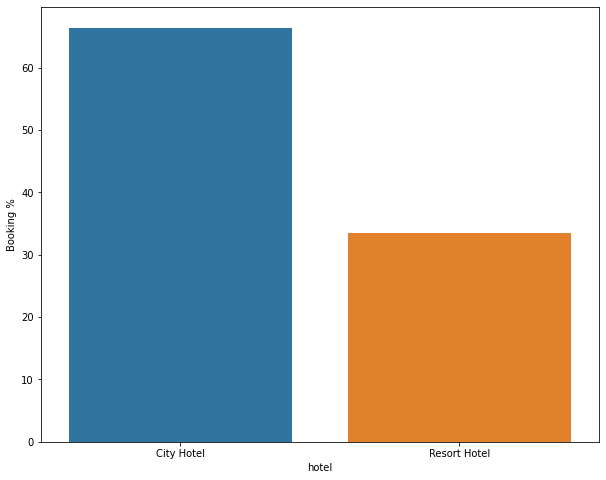

In [17]:
# Calculating the percentage of booking in each hotel
grouped_by_hotel = hotel_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (10,8))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


# **Observation:**
 

*    From above graph we can see that city hotel have maximum number of booking than Resort hotel 







## 2.What is the percentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

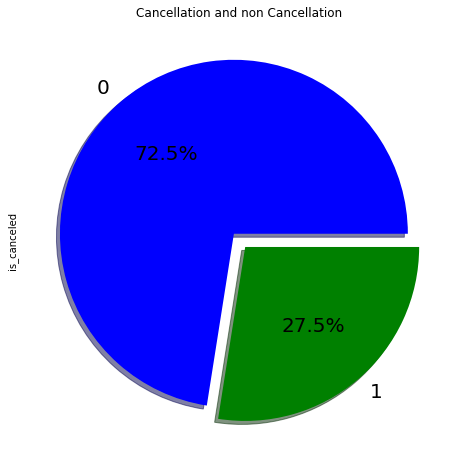

In [18]:
# Calculating the percentage of cancellation
colors = ['blue','green']
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True,colors=colors, figsize=(15,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

# **Observation**:


##    From the above piechart we see that:-

0 = Non cancelled 1 = cancelled

27.5 % is cancelled


## 3.Calculate the **ADR** with respect to **distribution channel**?

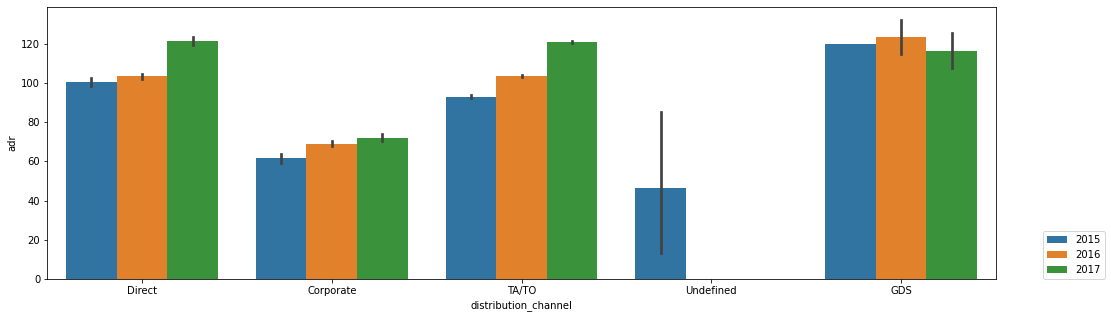

In [19]:
#ADR with respect to distribution channel
plt.figure(figsize=(17,5))
sns.barplot(data=df, x='distribution_channel',y='adr',hue='arrival_date_year')
plt.legend(loc=(1.05,0))

# **Observation:**


*    Max ADR comes from GDS(overall) except for year 2017.
*   Min ADR comes from Corporate and undefined channel in the 3 years



## 4.Find out the booking trends on total stays by the customers?

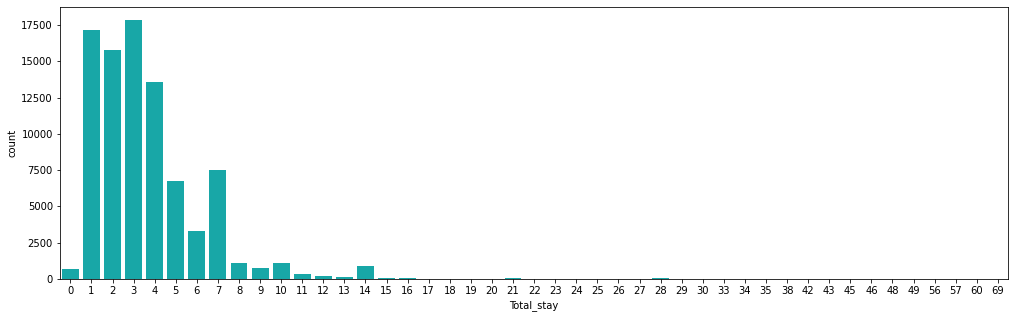

In [20]:
#visualisation of duration of stays
df[['stays_in_weekend_nights','stays_in_week_nights']]=df[['stays_in_weekend_nights','stays_in_week_nights']].astype('int64')
df['Total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(17,5))
sns.countplot(x=df['Total_stay'],color='c')
plt.show()

# **Observation:**

*   Most of the people stayed less than 5 days in the hotel and only few people
stayed beyond 10 days.

## 5.Which has the average adr between hotels?

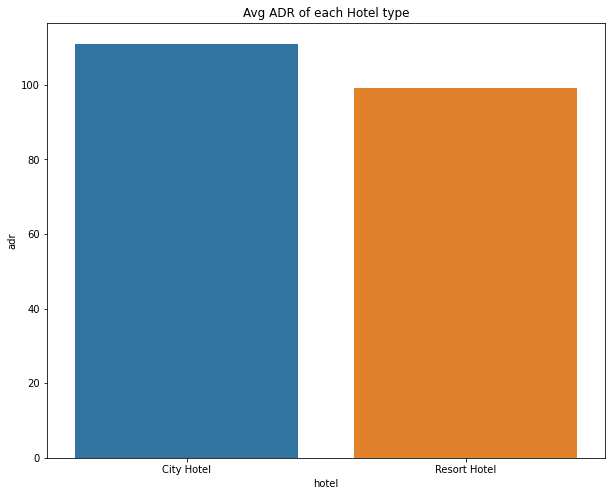

In [21]:
#grouping by hotel adr
group_by_hotel=df.groupby('hotel')
highest_adr=group_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('hotel') 
plt.ylabel('adr')
plt.title("Avg ADR of each Hotel type")
#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# **Obervation**:



*   City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR More is the revenue.


## 6.Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

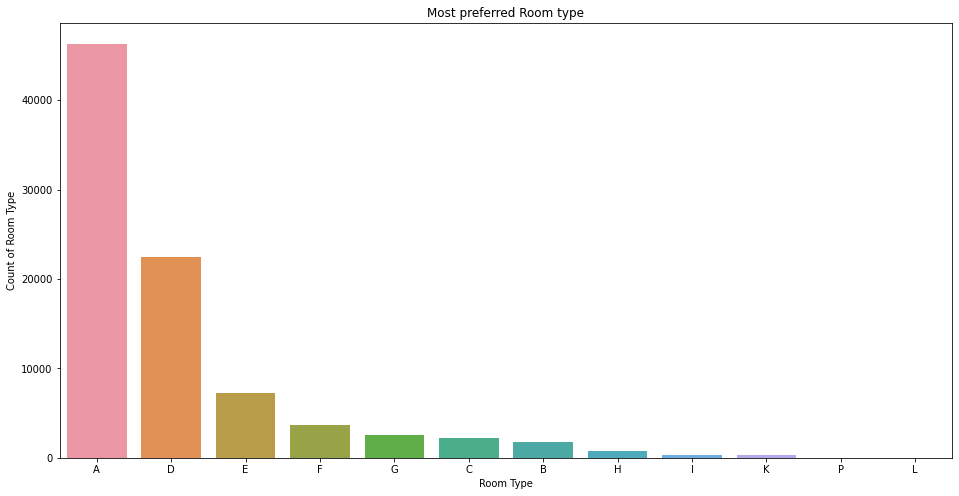

In [22]:
#make country database
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'guests '})[:10]
#set plotsize
plt.figure(figsize=(16,8)) 

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#set xlabel 
plt.xlabel('Room Type')
#set y label 
plt.ylabel('Count of Room Type')
#set title 
plt.title("Most preferred Room type")


# **Observation:**


*   The most preferred Room type is "A".




### 7.Market segment that has highest cancellation rate?

In [23]:
# Defining market segment
market_segment_df=df[df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

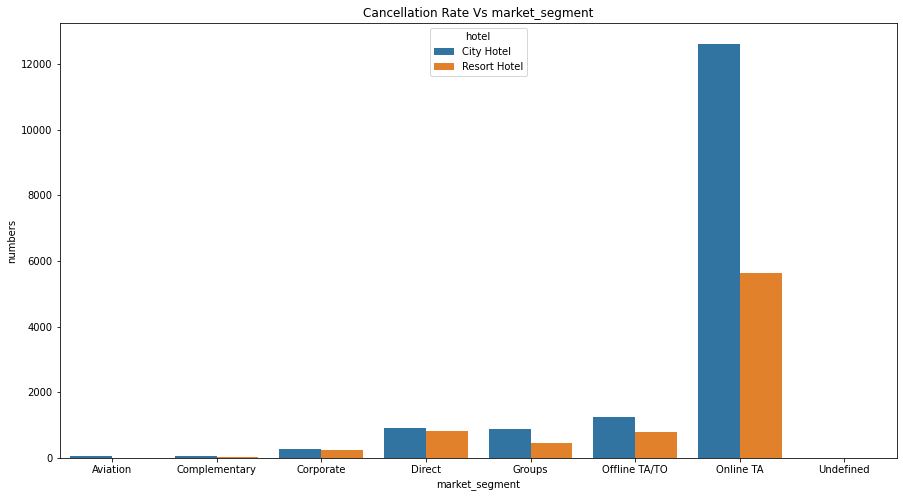

In [24]:
#set plotsizde and plot barchart
plt.figure(figsize=(15,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('numbers')
plt.title('Cancellation Rate Vs market_segment')

# **Observation:**


*   Online TA/TO has highest cancellation rate



### 8.Which meal type is most preferred meal of customers?

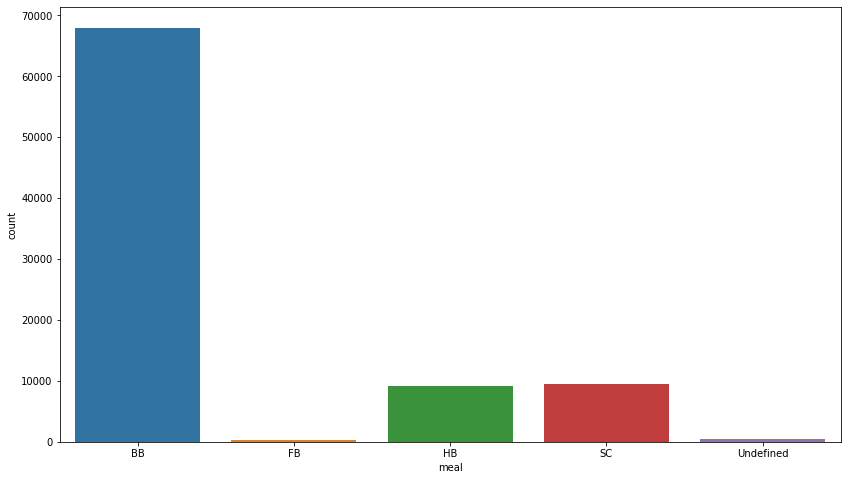

In [25]:
# Showing the most preferred meal of customers in bar graph
plt.figure( figsize=(14, 8))

sns.countplot(x = df['meal'])
plt.show()

# **Observation:**


*   BB is the most preferred meal by the customers



### 9.Which Hotel makes More revenue?

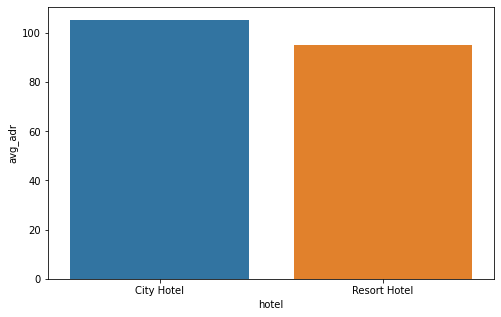

In [26]:
  # calculating average adr
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

# **Observation:**


*   City hotel makes more revenue




## 10.Percentage of car parking space required?

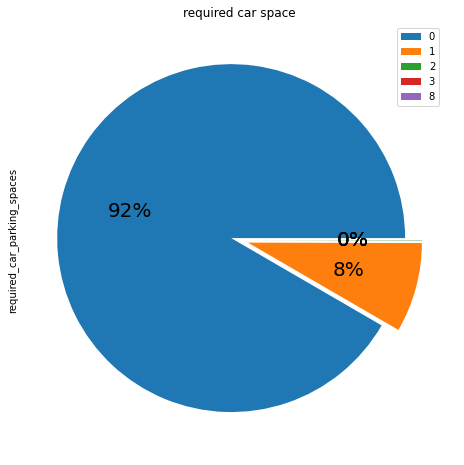

In [27]:
#Showing the car parking space in pie graph
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.0f%%',shadow=False,figsize=(12,8),fontsize=20,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('required car space')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation:**


*   91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.




## 11.What are the **busiest booking month** of a calendar year?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


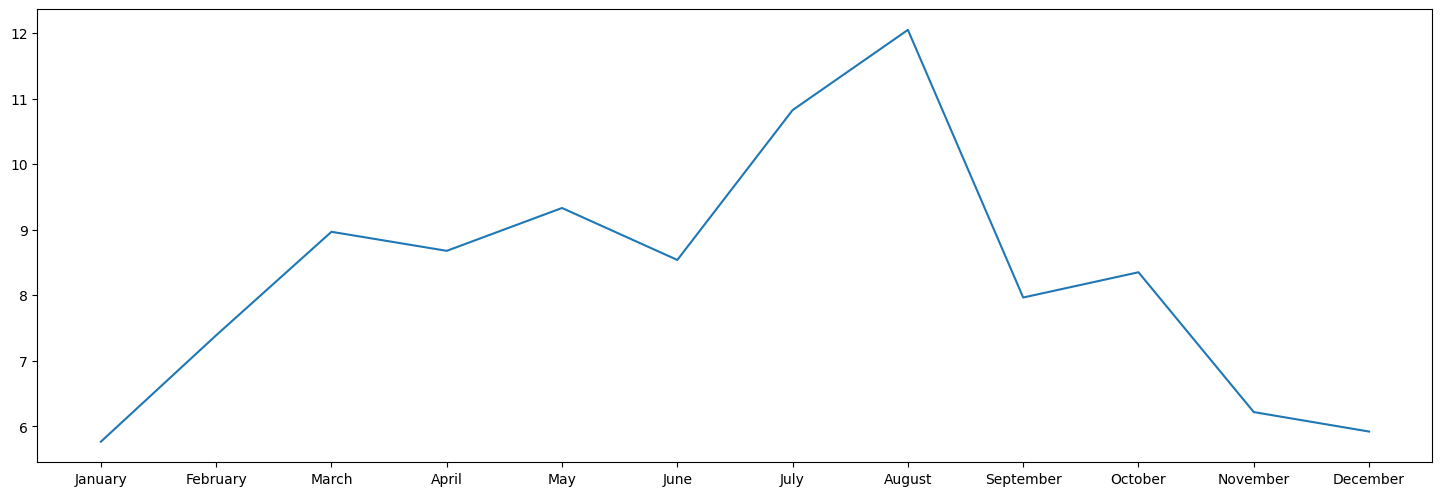

In [28]:
#Busiest Booking Month
      
hotel_no_cancel=df[df['is_canceled']==0]
import calendar
month_arranged=hotel_no_cancel['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
figures=plt.figure(figsize=(18,6),dpi=100)
x=month_arranged.index
y=month_arranged/month_arranged.sum()*100
sns.lineplot(x,y.values)

# **Observation:**


*    Max Booking are done from the period of July to Mid-August in a calendar Year
*   Min Booking are done from the period of January - February and November - December

*    Booking are low in the start and end of a calendar year and it gradually increase and peaks at middle of a calendar year and then drops down.






# **Correlation of the columns**

Text(0.5, 1.0, 'Co-relation of the columns')

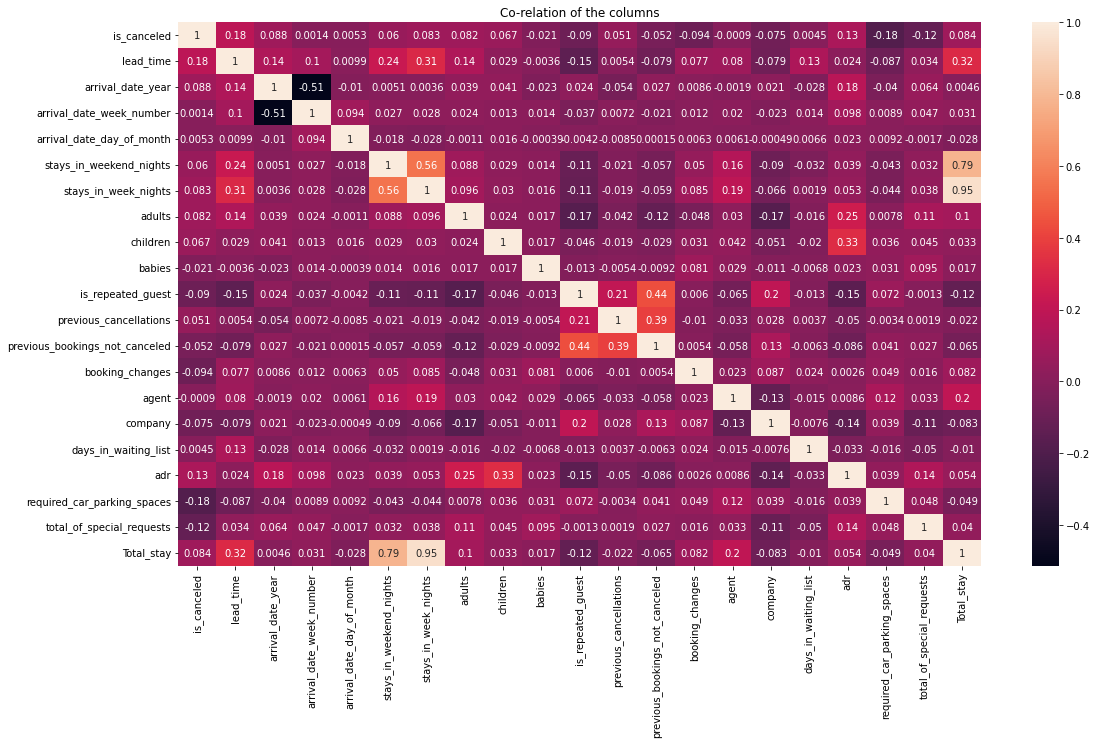

In [30]:
# Showing the correlation of the columns in graph
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

# **Observation:**




*   lead_time and total_stay is positively corelated.it means stay  of cutsomer is proportional to lead time.

*   is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room.


*   Adults,childrens and babies are corelated to each other. more customer more the adr.
*   Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.







# **Conclusion**

*   Maximum guests are booking city hotel over resort hotel.
*   The percentage of cancellation is 27.5% and the percentage of non-cancellation is 72.5%.




*   Since GDS gives better ADR, it would be the best among distribution channel as it gives higher revenue even with lower occupancy.

*   Most of the people stayed less than 5 days in the hotel.


*   City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR More is the revenue.
*   After analysing we see that the most preferred Room type is "A".


*   Online TA/TO has highest cancellation rate.

*   BB is the most preferred meal by the guests.


*   After analysing we see that city hotel makes more revenue than resort hotel.

*   91.6 % guests did not required the parking space.


*   Max. Booking happens July to Mid-August. Marketing and booking offer provided in these months can yield higher booking.






*   lead_time and total_stay is positively corelated.it means stay of cutsomer is proportional to lead time.


*   is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room.

*   Adults,childrens and babies are corelated to each other. more customer more the adr.
*   Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

  










